# Reference
 

1.  [Informer2020](https://github.com/zhouhaoyi/Informer2020.git)
2.  [Time Series Forecasting With Deep Learning: A Survey](https://arxiv.org/abs/2004.13408)
3. [Temporal Fusion Transformers for Interpretable Multi-horizon Time Series Forecasting](https://arxiv.org/abs/1912.09363)
4. [Deep Transformer Models for Time Series Forecasting: The Influenza Prevalence Case](https://arxiv.org/abs/2001.08317)

# In this notebook, we will only use Oil temperature(OT) to predict future Oil Temperature

# 1. prepare data

In [18]:
#!git clone https://github.com/zhouhaoyi/Informer2020.git
!git clone https://github.com/zhouhaoyi/ETDataset.git
!ls

fatal: destination path 'ETDataset' already exists and is not an empty directory.
ETDataset  sample_data


In [19]:
import pandas as pd 
import matplotlib.pyplot as plt

df1 = pd.read_csv('/content/ETDataset/ETT-small/ETTh1.csv')
#df2 = pd.read_csv('/content/ETDataset/ETT-small/ETTh2.csv')
df1.iloc[:25,:]  # df.iloc[0:25,1:]

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000
5,2016-07-01 05:00:00,5.626,2.143,1.528,0.533,4.051,1.371,21.174000
6,2016-07-01 06:00:00,7.167,2.947,2.132,0.782,5.026,1.858,22.792000
7,2016-07-01 07:00:00,7.435,3.282,2.310,1.031,5.087,2.224,23.143999
8,2016-07-01 08:00:00,5.559,3.014,2.452,1.173,2.955,1.432,21.667000
9,2016-07-01 09:00:00,4.555,2.545,1.919,0.817,2.680,1.371,17.445999


In [20]:
df1['year'] = df1.date.str[2:4]
df1['month'] = df1.date.str[5:7]
df1['day'] = df1.date.str[8:10]
df1['hour'] = df1.date.str[11:13]
df1.drop(['date'],axis=1,inplace=True)
df1= df1.apply(pd.to_numeric)
df1= df1[['year', 'month', 'day', 'hour','HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT']]
df1

,year,month,day,hour,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,16,7,1,0,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,16,7,1,1,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,16,7,1,2,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,16,7,1,3,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,16,7,1,4,5.358,1.942,1.492,0.462,3.868,1.279,21.948000
...,...,...,...,...,...,...,...,...,...,...,...
17415,18,6,26,15,-1.674,3.550,-5.615,2.132,3.472,1.523,10.904000
17416,18,6,26,16,-5.492,4.287,-9.132,2.274,3.533,1.675,11.044000
17417,18,6,26,17,2.813,3.818,-0.817,2.097,3.716,1.523,10.271000
17418,18,6,26,18,9.243,3.818,5.472,2.097,3.655,1.432,9.778000


In [21]:
normalization = True
if normalization:
    df1_mean, df1_std = df1.mean(), df1.std()
    df1= (df1-df1_mean)/df1_std
    df1

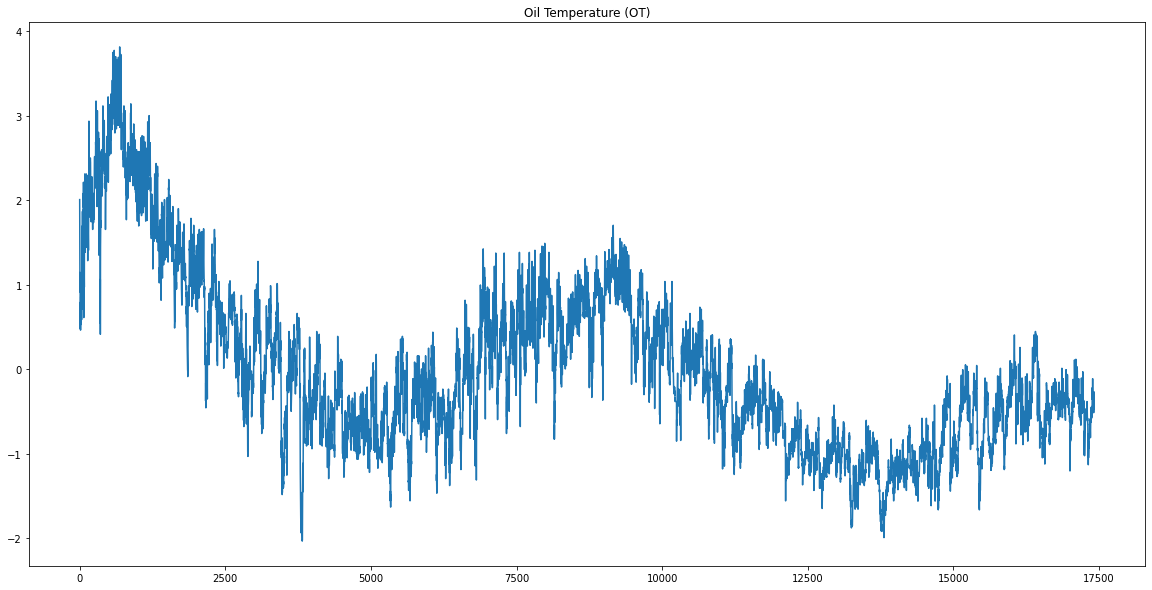

In [22]:
plt.figure(figsize=(20,10))
plt.plot(df1.OT)
plt.title('Oil Temperature (OT)')
plt.show()

In [23]:
# adding time lag features
# df1.shift(24)

# 2. Define functions for transformer

We start with building a transformer architecture
by modifying 
https://github.com/pytorch/pytorch/blob/master/torch/nn/modules/transformer.py

## attention

In [24]:
import copy
from typing import Optional, Any, Tuple

import torch
from torch import Tensor
from torch.nn import functional as F
from torch.nn.init import xavier_uniform_
from torch.nn.init import constant_
from torch.nn.init import xavier_normal_
from torch.nn import Parameter, Module, ModuleList, Linear, Dropout, LayerNorm


class MultiheadAttention(Module):
    r"""Allows the model to jointly attend to information
    from different representation subspaces.
    See `Attention Is All You Need <https://arxiv.org/abs/1706.03762>`_
    .. math::
        \text{MultiHead}(Q, K, V) = \text{Concat}(head_1,\dots,head_h)W^O
    where :math:`head_i = \text{Attention}(QW_i^Q, KW_i^K, VW_i^V)`.
    Args:
        embed_dim: total dimension of the model.
        num_heads: parallel attention heads.
        dropout: a Dropout layer on attn_output_weights. Default: 0.0.
        bias: add bias as module parameter. Default: True.
        add_bias_kv: add bias to the key and value sequences at dim=0.
        add_zero_attn: add a new batch of zeros to the key and
                       value sequences at dim=1.
        kdim: total number of features in key. Default: None.
        vdim: total number of features in value. Default: None.
        batch_first: If ``True``, then the input and output tensors are provided
            as (batch, seq, feature). Default: ``False`` (seq, batch, feature).
    Note that if :attr:`kdim` and :attr:`vdim` are None, they will be set
    to :attr:`embed_dim` such that query, key, and value have the same
    number of features.
    Examples::
        >>> multihead_attn = nn.MultiheadAttention(embed_dim, num_heads)
        >>> attn_output, attn_output_weights = multihead_attn(query, key, value)
    """
    __constants__ = ['batch_first']
    bias_k: Optional[torch.Tensor]
    bias_v: Optional[torch.Tensor]

    def __init__(self, embed_dim, num_heads, dropout=0., bias=True, add_bias_kv=False, add_zero_attn=False,
                 kdim=None, vdim=None, batch_first=False, device=None, dtype=None) -> None:
        factory_kwargs = {'device': device, 'dtype': dtype}
        super(MultiheadAttention, self).__init__()
        self.embed_dim = embed_dim
        self.kdim = kdim if kdim is not None else embed_dim
        self.vdim = vdim if vdim is not None else embed_dim
        self._qkv_same_embed_dim = self.kdim == embed_dim and self.vdim == embed_dim

        self.num_heads = num_heads
        self.dropout = dropout
        self.batch_first = batch_first
        self.head_dim = embed_dim // num_heads
        assert self.head_dim * num_heads == self.embed_dim, "embed_dim must be divisible by num_heads"

        if self._qkv_same_embed_dim is False:
            self.q_proj_weight = Parameter(torch.empty((embed_dim, embed_dim), **factory_kwargs))
            self.k_proj_weight = Parameter(torch.empty((embed_dim, self.kdim), **factory_kwargs))
            self.v_proj_weight = Parameter(torch.empty((embed_dim, self.vdim), **factory_kwargs))
            self.register_parameter('in_proj_weight', None)
        else:
            self.in_proj_weight = Parameter(torch.empty((3 * embed_dim, embed_dim), **factory_kwargs))
            self.register_parameter('q_proj_weight', None)
            self.register_parameter('k_proj_weight', None)
            self.register_parameter('v_proj_weight', None)

        if bias:
            self.in_proj_bias = Parameter(torch.empty(3 * embed_dim, **factory_kwargs))
        else:
            self.register_parameter('in_proj_bias', None)
        self.out_proj = Linear(embed_dim, embed_dim, bias=bias)

        if add_bias_kv:
            self.bias_k = Parameter(torch.empty((1, 1, embed_dim), **factory_kwargs))
            self.bias_v = Parameter(torch.empty((1, 1, embed_dim), **factory_kwargs))
        else:
            self.bias_k = self.bias_v = None

        self.add_zero_attn = add_zero_attn

        self._reset_parameters()

    def _reset_parameters(self):
        if self._qkv_same_embed_dim:
            xavier_uniform_(self.in_proj_weight)
        else:
            xavier_uniform_(self.q_proj_weight)
            xavier_uniform_(self.k_proj_weight)
            xavier_uniform_(self.v_proj_weight)

        if self.in_proj_bias is not None:
            constant_(self.in_proj_bias, 0.)
            constant_(self.out_proj.bias, 0.)
        if self.bias_k is not None:
            xavier_normal_(self.bias_k)
        if self.bias_v is not None:
            xavier_normal_(self.bias_v)

    def __setstate__(self, state):
        # Support loading old MultiheadAttention checkpoints generated by v1.1.0
        if '_qkv_same_embed_dim' not in state:
            state['_qkv_same_embed_dim'] = True

        super(MultiheadAttention, self).__setstate__(state)

    def forward(self, query: Tensor, key: Tensor, value: Tensor, key_padding_mask: Optional[Tensor] = None,
                need_weights: bool = True, attn_mask: Optional[Tensor] = None) -> Tuple[Tensor, Optional[Tensor]]:
        r"""
    Args:
        query, key, value: map a query and a set of key-value pairs to an output.
            See "Attention Is All You Need" for more details.
        key_padding_mask: if provided, specified padding elements in the key will
            be ignored by the attention. When given a binary mask and a value is True,
            the corresponding value on the attention layer will be ignored. When given
            a byte mask and a value is non-zero, the corresponding value on the attention
            layer will be ignored
        need_weights: output attn_output_weights.
        attn_mask: 2D or 3D mask that prevents attention to certain positions. A 2D mask will be broadcasted for all
            the batches while a 3D mask allows to specify a different mask for the entries of each batch.
    Shapes for inputs:
        - query: :math:`(L, N, E)` where L is the target sequence length, N is the batch size, E is
          the embedding dimension. :math:`(N, L, E)` if ``batch_first`` is ``True``.
        - key: :math:`(S, N, E)`, where S is the source sequence length, N is the batch size, E is
          the embedding dimension. :math:`(N, S, E)` if ``batch_first`` is ``True``.
        - value: :math:`(S, N, E)` where S is the source sequence length, N is the batch size, E is
          the embedding dimension. :math:`(N, S, E)` if ``batch_first`` is ``True``.
        - key_padding_mask: :math:`(N, S)` where N is the batch size, S is the source sequence length.
          If a ByteTensor is provided, the non-zero positions will be ignored while the position
          with the zero positions will be unchanged. If a BoolTensor is provided, the positions with the
          value of ``True`` will be ignored while the position with the value of ``False`` will be unchanged.
        - attn_mask: if a 2D mask: :math:`(L, S)` where L is the target sequence length, S is the
          source sequence length.
          If a 3D mask: :math:`(N\cdot\text{num\_heads}, L, S)` where N is the batch size, L is the target sequence
          length, S is the source sequence length. ``attn_mask`` ensure that position i is allowed to attend
          the unmasked positions. If a ByteTensor is provided, the non-zero positions are not allowed to attend
          while the zero positions will be unchanged. If a BoolTensor is provided, positions with ``True``
          is not allowed to attend while ``False`` values will be unchanged. If a FloatTensor
          is provided, it will be added to the attention weight.
    Shapes for outputs:
        - attn_output: :math:`(L, N, E)` where L is the target sequence length, N is the batch size,
          E is the embedding dimension. :math:`(N, L, E)` if ``batch_first`` is ``True``.
        - attn_output_weights: :math:`(N, L, S)` where N is the batch size,
          L is the target sequence length, S is the source sequence length.
        """
        if self.batch_first:
            query, key, value = [x.transpose(1, 0) for x in (query, key, value)]

        if not self._qkv_same_embed_dim:
            attn_output, attn_output_weights = F.multi_head_attention_forward(
                query, key, value, self.embed_dim, self.num_heads,
                self.in_proj_weight, self.in_proj_bias,
                self.bias_k, self.bias_v, self.add_zero_attn,
                self.dropout, self.out_proj.weight, self.out_proj.bias,
                training=self.training,
                key_padding_mask=key_padding_mask, need_weights=need_weights,
                attn_mask=attn_mask, use_separate_proj_weight=True,
                q_proj_weight=self.q_proj_weight, k_proj_weight=self.k_proj_weight,
                v_proj_weight=self.v_proj_weight)
        else:
            attn_output, attn_output_weights = F.multi_head_attention_forward(
                query, key, value, self.embed_dim, self.num_heads,
                self.in_proj_weight, self.in_proj_bias,
                self.bias_k, self.bias_v, self.add_zero_attn,
                self.dropout, self.out_proj.weight, self.out_proj.bias,
                training=self.training,
                key_padding_mask=key_padding_mask, need_weights=need_weights,
                attn_mask=attn_mask)
        if self.batch_first:
            return attn_output.transpose(1, 0), attn_output_weights
        else:
            return attn_output, attn_output_weights


In [25]:
#Step 1 run original code and debug
from dill.source import getsource
#print(getsource(Linear)) 

# There is no device or dtype for Linear and LayerNorm
# Solution: remove {, **factory_kwargs}

## Positional encoding

In [26]:
# how to use positional encoding 
# https://pytorch.org/tutorials/beginner/transformer_tutorial.html
from typing import Optional, Union
import numpy as np
import torch
def original_PE(length: int, d_model: int) -> torch.Tensor:
    """Generate positional encoding as described in original paper.  :class:`torch.Tensor`
    Parameters
    ----------
    length:
        Time window length, i.e. K.
    d_model:
        Dimension of the model vector.(number of features)
    Returns
    -------
        Tensor of shape (K, d_model).
    """
    PE = torch.zeros((length, d_model))

    pos = torch.arange(length).unsqueeze(1)
    PE[:, 0::2] = torch.sin(
        pos / torch.pow(1000, torch.arange(0, d_model, 2, dtype=torch.float32)/d_model))
    PE[:, 1::2] = torch.cos(
        pos / torch.pow(1000, torch.arange(1, d_model, 2, dtype=torch.float32)/d_model))

    return PE

original_PE(length=4, d_model=7)

tensor([[0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000],
        [0.8415, 0.9313, 0.1385, 0.9987, 0.0193, 1.0000, 0.0027],
        [0.9093, 0.7347, 0.2743, 0.9946, 0.0386, 0.9999, 0.0054],
        [0.1411, 0.4372, 0.4049, 0.9880, 0.0579, 0.9998, 0.0080]])

## transformer

In [27]:
import copy
from typing import Optional, Any, Tuple

import torch
from torch import Tensor
#from torch.nn.modules.activation import MultiheadAttention
from torch.nn import functional as F
from torch.nn.init import xavier_uniform_
from torch.nn.init import constant_
from torch.nn.init import xavier_normal_
from torch.nn import Parameter, Module, ModuleList, Linear, Dropout, LayerNorm




class TimeTransformer(Module):
    r"""A transformer model. User is able to modify the attributes as needed. The architecture
    is based on the paper "Attention Is All You Need". Ashish Vaswani, Noam Shazeer,
    Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N Gomez, Lukasz Kaiser, and
    Illia Polosukhin. 2017. Attention is all you need. In Advances in Neural Information
    Processing Systems, pages 6000-6010. Users can build the BERT(https://arxiv.org/abs/1810.04805)
    model with corresponding parameters.

    Args:
        d_linear: output size of attention used to linear combine. (time length)
        d_model: the number of expected features in the encoder/decoder inputs (default=512).
        nhead: the number of heads in the multiheadattention models (default=8).
        num_encoder_layers: the number of sub-encoder-layers in the encoder (default=6).
        num_decoder_layers: the number of sub-decoder-layers in the decoder (default=6).
        dim_feedforward: the dimension of the feedforward network model (default=2048).
        dropout: the dropout value (default=0.1).
        activation: the activation function of encoder/decoder intermediate layer, relu or gelu (default=relu).
        custom_encoder: custom encoder (default=None).
        custom_decoder: custom decoder (default=None).
        layer_norm_eps: the eps value in layer normalization components (default=1e-5).
        batch_first: If ``True``, then the input and output tensors are provided
            as (batch, seq, feature). Default: ``False`` (seq, batch, feature).

    Examples::
        >>> transformer_model = TimeTransformer(nhead=16, num_encoder_layers=12)
        >>> src = torch.rand((10, 32, 512))
        >>> tgt = torch.rand((20, 32, 512))
        >>> out = transformer_model(src, tgt)

    Note: A full example to apply nn.Transformer module for the word language model is available in
    https://github.com/pytorch/examples/tree/master/word_language_model
    """

    def __init__(self, d_linear: int = 10, d_model: int = 512, d_out: int = 512, nhead: int = 8, num_encoder_layers: int = 6,
                 num_decoder_layers: int = 6, dim_feedforward: int = 2048, dropout: float = 0.05,
                 activation: str = "gelu", custom_encoder: Optional[Any] = None, custom_decoder: Optional[Any] = None,
                 layer_norm_eps: float = 1e-5, batch_first: bool = False, linear_end: bool = False,
                 device=None, dtype=None) -> None:
        factory_kwargs = {'device': device, 'dtype': dtype}
        super(TimeTransformer, self).__init__()

        if custom_encoder is not None:
            self.encoder = custom_encoder
        else:
            encoder_layer = TransformerEncoderLayer(d_model, nhead, dim_feedforward, dropout,
                                                    activation, layer_norm_eps, batch_first,
                                                    **factory_kwargs)
            encoder_norm = LayerNorm(d_model, eps=layer_norm_eps)
            self.encoder = TransformerEncoder(encoder_layer, num_encoder_layers, encoder_norm)

        if custom_decoder is not None:
            self.decoder = custom_decoder
        else:
            decoder_layer = TransformerDecoderLayer(d_model, nhead, dim_feedforward, dropout,
                                                    activation, layer_norm_eps, batch_first,
                                                    **factory_kwargs)
            decoder_norm = LayerNorm(d_model, eps=layer_norm_eps)
            self.decoder = TransformerDecoder(decoder_layer, num_decoder_layers, decoder_norm)
        self.linear_layer1 = torch.nn.Linear(d_model, d_model, bias=True)
        self.linear_layer2 = torch.nn.Linear(d_model, 1, bias=True)
        self.linear_time_augment_layer = torch.nn.Linear(d_linear+1, d_out, bias=True)
        self.norm_layer = torch.nn.LayerNorm(d_model, eps= layer_norm_eps)
        #self._reset_parameters()
        self.activation = _get_activation_fn(activation)

        self.d_model = d_model
        self.d_out = d_out
        self.nhead = nhead
        self.d_linear = d_linear

        self.batch_first = batch_first
        self.linear_end = linear_end

    def forward(self, src: Tensor, tgt: Tensor, src_mask: Optional[Tensor] = None, tgt_mask: Optional[Tensor] = None,
                memory_mask: Optional[Tensor] = None, src_key_padding_mask: Optional[Tensor] = None,
                tgt_key_padding_mask: Optional[Tensor] = None, memory_key_padding_mask: Optional[Tensor] = None) -> Tensor:
        r"""Take in and process masked source/target sequences.

        Args:
            src: the sequence to the encoder (required).
            tgt: the sequence to the decoder (required).
            src_mask: the additive mask for the src sequence (optional).
            tgt_mask: the additive mask for the tgt sequence (optional).
            memory_mask: the additive mask for the encoder output (optional).
            src_key_padding_mask: the ByteTensor mask for src keys per batch (optional).
            tgt_key_padding_mask: the ByteTensor mask for tgt keys per batch (optional).
            memory_key_padding_mask: the ByteTensor mask for memory keys per batch (optional).

        Shape:
            - src: :math:`(S, N, E)`, `(N, S, E)` if batch_first.
            - tgt: :math:`(T, N, E)`, `(N, T, E)` if batch_first.
            - src_mask: :math:`(S, S)`.
            - tgt_mask: :math:`(T, T)`.
            - memory_mask: :math:`(T, S)`.
            - src_key_padding_mask: :math:`(N, S)`.
            - tgt_key_padding_mask: :math:`(N, T)`.
            - memory_key_padding_mask: :math:`(N, S)`.

            Note: [src/tgt/memory]_mask ensures that position i is allowed to attend the unmasked
            positions. If a ByteTensor is provided, the non-zero positions are not allowed to attend
            while the zero positions will be unchanged. If a BoolTensor is provided, positions with ``True``
            are not allowed to attend while ``False`` values will be unchanged. If a FloatTensor
            is provided, it will be added to the attention weight.
            [src/tgt/memory]_key_padding_mask provides specified elements in the key to be ignored by
            the attention. If a ByteTensor is provided, the non-zero positions will be ignored while the zero
            positions will be unchanged. If a BoolTensor is provided, the positions with the
            value of ``True`` will be ignored while the position with the value of ``False`` will be unchanged.

            - output: :math:`(T, N, E)`, `(N, T, E)` if batch_first.

            Note: Due to the multi-head attention architecture in the transformer model,
            the output sequence length of a transformer is same as the input sequence
            (i.e. target) length of the decode.

            where S is the source sequence length, T is the target sequence length, N is the
            batch size, E is the feature number

        Examples:
            >>> output = transformer_model(src, tgt, src_mask=src_mask, tgt_mask=tgt_mask)
        """

        if not self.batch_first and src.size(1) != tgt.size(1):
            raise RuntimeError("the batch number of src and tgt must be equal")
        elif self.batch_first and src.size(0) != tgt.size(0):
            raise RuntimeError("the batch number of src and tgt must be equal")

        if src.size(2) != self.d_model or tgt.size(2) != self.d_model:
            raise RuntimeError("the feature number of src and tgt must be equal to d_model")

        memory = self.encoder(src, mask=src_mask, src_key_padding_mask=src_key_padding_mask)
        output = self.decoder(tgt, memory, tgt_mask=tgt_mask, memory_mask=memory_mask,
                              tgt_key_padding_mask=tgt_key_padding_mask,
                              memory_key_padding_mask=memory_key_padding_mask)
        # combining data at different time
        # swap time and feature index
        if self.batch_first:
            time_ind, fea_ind = 1, 2
        else:
            time_ind, fea_ind = 0, 2
        # print(output.shape)
        if self.linear_end:
            # output = self.activation(self.linear_layer1(output))
            # print('output1', output.shape)
            # output = self.activation(self.linear_layer2(output))
            #output = self.norm_layer(output)
            # when decoder input has time_length >1 
            output = output.transpose(time_ind, fea_ind)
            output = self.linear_time_augment_layer(output)
        return output

    def generate_square_subsequent_mask(self, sz: int) -> Tensor:
        r"""Generate a square mask for the sequence. The masked positions are filled with float('-inf').
            Unmasked positions are filled with float(0.0).
        """
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

    def _reset_parameters(self):
        r"""Initiate parameters in the transformer model."""

        for p in self.parameters():
            if p.dim() > 1:
                xavier_uniform_(p)


class TransformerEncoder(Module):
    r"""TransformerEncoder is a stack of N encoder layers

    Args:
        encoder_layer: an instance of the TransformerEncoderLayer() class (required).
        num_layers: the number of sub-encoder-layers in the encoder (required).
        norm: the layer normalization component (optional).

    Examples::
        >>> encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8)
        >>> transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=6)
        >>> src = torch.rand(10, 32, 512)
        >>> out = transformer_encoder(src)
    """
    __constants__ = ['norm']

    def __init__(self, encoder_layer, num_layers, norm=None):
        super(TransformerEncoder, self).__init__()
        self.layers = _get_clones(encoder_layer, num_layers)
        self.num_layers = num_layers
        self.norm = norm

    def forward(self, src: Tensor, mask: Optional[Tensor] = None, src_key_padding_mask: Optional[Tensor] = None) -> Tensor:
        r"""Pass the input through the encoder layers in turn.

        Args:
            src: the sequence to the encoder (required).
            mask: the mask for the src sequence (optional).
            src_key_padding_mask: the mask for the src keys per batch (optional).

        Shape:
            see the docs in Transformer class.
        """
        output = src

        for mod in self.layers:
            output = mod(output, src_mask=mask, src_key_padding_mask=src_key_padding_mask)

        if self.norm is not None:
            output = self.norm(output)

        return output


class TransformerDecoder(Module):
    r"""TransformerDecoder is a stack of N decoder layers

    Args:
        decoder_layer: an instance of the TransformerDecoderLayer() class (required).
        num_layers: the number of sub-decoder-layers in the decoder (required).
        norm: the layer normalization component (optional).

    Examples::
        >>> decoder_layer = nn.TransformerDecoderLayer(d_model=512, nhead=8)
        >>> transformer_decoder = nn.TransformerDecoder(decoder_layer, num_layers=6)
        >>> memory = torch.rand(10, 32, 512)
        >>> tgt = torch.rand(20, 32, 512)
        >>> out = transformer_decoder(tgt, memory)
    """
    __constants__ = ['norm']

    def __init__(self, decoder_layer, num_layers, norm=None):
        super(TransformerDecoder, self).__init__()
        self.layers = _get_clones(decoder_layer, num_layers)
        self.num_layers = num_layers
        self.norm = norm

    def forward(self, tgt: Tensor, memory: Tensor, tgt_mask: Optional[Tensor] = None,
                memory_mask: Optional[Tensor] = None, tgt_key_padding_mask: Optional[Tensor] = None,
                memory_key_padding_mask: Optional[Tensor] = None) -> Tensor:
        r"""Pass the inputs (and mask) through the decoder layer in turn.

        Args:
            tgt: the sequence to the decoder (required).
            memory: the sequence from the last layer of the encoder (required).
            tgt_mask: the mask for the tgt sequence (optional).
            memory_mask: the mask for the memory sequence (optional).
            tgt_key_padding_mask: the mask for the tgt keys per batch (optional).
            memory_key_padding_mask: the mask for the memory keys per batch (optional).

        Shape:
            see the docs in Transformer class.
        """
        output = tgt

        for mod in self.layers:
            output = mod(output, memory, tgt_mask=tgt_mask,
                         memory_mask=memory_mask,
                         tgt_key_padding_mask=tgt_key_padding_mask,
                         memory_key_padding_mask=memory_key_padding_mask)

        if self.norm is not None:
            output = self.norm(output)

        return output

class TransformerEncoderLayer(Module):
    r"""TransformerEncoderLayer is made up of self-attn and feedforward network.
    This standard encoder layer is based on the paper "Attention Is All You Need".
    Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N Gomez,
    Lukasz Kaiser, and Illia Polosukhin. 2017. Attention is all you need. In Advances in
    Neural Information Processing Systems, pages 6000-6010. Users may modify or implement
    in a different way during application.

    Args:
        d_model: the number of expected features in the input (required).
        nhead: the number of heads in the multiheadattention models (required).
        dim_feedforward: the dimension of the feedforward network model (default=2048).
        dropout: the dropout value (default=0.1).
        activation: the activation function of intermediate layer, relu or gelu (default=relu).
        layer_norm_eps: the eps value in layer normalization components (default=1e-5).
        batch_first: If ``True``, then the input and output tensors are provided
            as (batch, seq, feature). Default: ``False``.

    Examples::
        >>> encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8)
        >>> src = torch.rand(10, 32, 512)
        >>> out = encoder_layer(src)

    Alternatively, when ``batch_first`` is ``True``:
        >>> encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8, batch_first=True)
        >>> src = torch.rand(32, 10, 512)
        >>> out = encoder_layer(src)
    """
    __constants__ = ['batch_first']

    def __init__(self, d_model, nhead, dim_feedforward=2048, dropout=0.1, activation="gelu",
                 layer_norm_eps=1e-5, batch_first=False,
                 device=None, dtype=None) -> None:
        factory_kwargs = {'device': device, 'dtype': dtype}
        super(TransformerEncoderLayer, self).__init__()

        
        self.self_attn = MultiheadAttention(d_model, nhead, dropout=dropout, batch_first=batch_first,
                                            **factory_kwargs)
        # Implementation of Feedforward model
        self.linear1 = Linear(d_model, dim_feedforward)
        self.dropout = Dropout(dropout)
        self.linear2 = Linear(dim_feedforward, d_model)

        self.norm1 = LayerNorm(d_model, eps=layer_norm_eps)
        self.norm2 = LayerNorm(d_model, eps=layer_norm_eps)
        self.dropout1 = Dropout(dropout)
        self.dropout2 = Dropout(dropout)

        self.activation = _get_activation_fn(activation)

    def __setstate__(self, state):
        if 'activation' not in state:
            state['activation'] = F.gelu
        super(TransformerEncoderLayer, self).__setstate__(state)

    def forward(self, src: Tensor, src_mask: Optional[Tensor] = None, src_key_padding_mask: Optional[Tensor] = None) -> Tensor:
        r"""Pass the input through the encoder layer.

        Args:
            src: the sequence to the encoder layer (required).
            src_mask: the mask for the src sequence (optional).
            src_key_padding_mask: the mask for the src keys per batch (optional).

        Shape:
            see the docs in Transformer class.
        """
        
        src2 = self.self_attn(src, src, src, attn_mask=src_mask,
                              key_padding_mask=src_key_padding_mask)[0]
        src = src + self.dropout1(src2)
        src = self.norm1(src)
        src2 = self.linear2(self.dropout(self.activation(self.linear1(src))))
        src = src + self.dropout2(src2)
        src = self.norm2(src)
        return src


class TransformerDecoderLayer(Module):
    r"""TransformerDecoderLayer is made up of self-attn, multi-head-attn and feedforward network.
    This standard decoder layer is based on the paper "Attention Is All You Need".
    Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N Gomez,
    Lukasz Kaiser, and Illia Polosukhin. 2017. Attention is all you need. In Advances in
    Neural Information Processing Systems, pages 6000-6010. Users may modify or implement
    in a different way during application.

    Args:
        d_model: the number of expected features in the input (required).
        nhead: the number of heads in the multiheadattention models (required).
        dim_feedforward: the dimension of the feedforward network model (default=2048).
        dropout: the dropout value (default=0.1).
        activation: the activation function of intermediate layer, relu or gelu (default=relu).
        layer_norm_eps: the eps value in layer normalization components (default=1e-5).
        batch_first: If ``True``, then the input and output tensors are provided
            as (batch, seq, feature). Default: ``False``.

    Examples::
        >>> decoder_layer = nn.TransformerDecoderLayer(d_model=512, nhead=8)
        >>> memory = torch.rand(10, 32, 512)
        >>> tgt = torch.rand(20, 32, 512)
        >>> out = decoder_layer(tgt, memory)

    Alternatively, when ``batch_first`` is ``True``:
        >>> decoder_layer = nn.TransformerDecoderLayer(d_model=512, nhead=8, batch_first=True)
        >>> memory = torch.rand(32, 10, 512)
        >>> tgt = torch.rand(32, 20, 512)
        >>> out = decoder_layer(tgt, memory)
    """
    __constants__ = ['batch_first']

    def __init__(self, d_model, nhead, dim_feedforward=2048, dropout=0.1, activation="relu",
                 layer_norm_eps=1e-5, batch_first=False, device=None, dtype=None) -> None:
        factory_kwargs = {'device': device, 'dtype': dtype}
        super(TransformerDecoderLayer, self).__init__()

        
        self.self_attn = MultiheadAttention(d_model, nhead, dropout=dropout, batch_first=batch_first,
                                            **factory_kwargs)
        self.multihead_attn = MultiheadAttention(d_model, nhead, dropout=dropout, batch_first=batch_first,
                                                 **factory_kwargs)
        # Implementation of Feedforward model
        self.linear1 = Linear(d_model, dim_feedforward)
        self.dropout = Dropout(dropout)
        self.linear2 = Linear(dim_feedforward, d_model)

        self.norm1 = LayerNorm(d_model, eps=layer_norm_eps)
        self.norm2 = LayerNorm(d_model, eps=layer_norm_eps)
        self.norm3 = LayerNorm(d_model, eps=layer_norm_eps)
        self.dropout1 = Dropout(dropout)
        self.dropout2 = Dropout(dropout)
        self.dropout3 = Dropout(dropout)

        self.activation = _get_activation_fn(activation)

    def __setstate__(self, state):
        if 'activation' not in state:
            state['activation'] = F.gelu
        super(TransformerDecoderLayer, self).__setstate__(state)

    def forward(self, tgt: Tensor, memory: Tensor, tgt_mask: Optional[Tensor] = None, memory_mask: Optional[Tensor] = None,
                tgt_key_padding_mask: Optional[Tensor] = None, memory_key_padding_mask: Optional[Tensor] = None) -> Tensor:
        r"""Pass the inputs (and mask) through the decoder layer.

        Args:
            tgt: the sequence to the decoder layer (required).
            memory: the sequence from the last layer of the encoder (required).
            tgt_mask: the mask for the tgt sequence (optional).
            memory_mask: the mask for the memory sequence (optional).
            tgt_key_padding_mask: the mask for the tgt keys per batch (optional).
            memory_key_padding_mask: the mask for the memory keys per batch (optional).

        Shape:
            see the docs in Transformer class.
        """
        
        tgt2 = self.self_attn(tgt, tgt, tgt, attn_mask=tgt_mask,
                              key_padding_mask=tgt_key_padding_mask)[0]
        tgt = tgt + self.dropout1(tgt2)
        tgt = self.norm1(tgt)
        tgt2 = self.multihead_attn(tgt, memory, memory, attn_mask=memory_mask,
                                   key_padding_mask=memory_key_padding_mask)[0]
        tgt = tgt + self.dropout2(tgt2)
        tgt = self.norm2(tgt)
        tgt2 = self.linear2(self.dropout(self.activation(self.linear1(tgt))))
        tgt = tgt + self.dropout3(tgt2)
        tgt = self.norm3(tgt)
        return tgt


def _get_clones(module, N):
    return ModuleList([copy.deepcopy(module) for i in range(N)])


def _get_activation_fn(activation):
    if activation == "relu":
        return F.relu
    elif activation == "gelu":
        return F.gelu

    raise RuntimeError("activation should be relu/gelu, not {}".format(activation))


# 3. Dataclass for torch transformer

### convert to float32

- only target time series OT

In [28]:
# df1.iloc[:,1:].to_numpy().dtype  # float64 is not compatible with pytorch linear layer
import numpy as np
df = np.float32(df1.iloc[:,-1].to_numpy())
print(df.dtype) 
df = np.expand_dims(df, 1)
df.shape

float32


(17420, 1)

- including all features

In [29]:
# df1.iloc[:,1:].to_numpy().dtype  # float64 is not compatible with pytorch linear layer
# import numpy as np
# df = np.float32(df1.to_numpy())
# print(df.dtype) 
# df.shape

In [30]:
df

array([[ 2.0084553 ],
       [ 1.6881545 ],
       [ 1.6881545 ],
       ...,
       [-0.35644808],
       [-0.41399485],
       [-0.43862435]], dtype=float32)

In [31]:
train = df[0:13000,:]
time_embed = 7*24; time_length = 1*24+1  # 24*k +1 since we use hourly data
test = df[13000-time_embed-time_length+2:,:]
print('the first to predict in test is ', df[13000,:])

the first to predict in test is  [-1.1283684]


In [32]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, data_array, time_embed, time_length):
        self.data = data_array
        self.time_embed = time_embed      #E embedding size (use time_step back data as feature embedding)
        self.time_length = time_length  #L length of history data want to project to

    def __getitem__(self, idx):  # idx runs from 0 to __len__(self)
        one_batch = self.data[idx:idx+self.time_embed].T
        for i in range(1, self.time_length):
            one_batch = np.append(one_batch, self.data[idx+i:idx+self.time_embed+i].T, axis=0)
        return one_batch # dim = [N, L, E] N: batch, L: time, E: embedding feature

    def __len__(self): # The number of samples we can generate 
        return len(self.data[:,0]) - self.time_length - self.time_embed +2

# test Dataset with an example
# time_embed = 3; time_length = 4
# traindata = Dataset(train, time_embed, time_length)
# print('total length: ',len(traindata))
# train_loader = torch.utils.data.DataLoader(traindata, batch_size=2, shuffle=False)
# #next(iter(train_loader))
# i = 0
# for x in train_loader:
#     i += 1
#     print('Input [%d] : \n' %i, x)
#     print(x.dtype)
#     if i>1:
#         print('dimension: ', x.shape)
#         break

In [33]:

batch_size = 64
traindata = Dataset(train, time_embed, time_length)
train_loader = torch.utils.data.DataLoader(traindata, batch_size=batch_size, shuffle=False, drop_last=True )
# drop_last is not good but has to do it if len(traindata) is not divisible by batch

testdata = Dataset(test, time_embed, time_length)
test_loader = torch.utils.data.DataLoader(testdata, batch_size=batch_size, shuffle=False, drop_last=True )

# 4- Modeling and Training (time attention)

    Args: 
    
        d_linear: output size of attention used to linear combine (same as total number of features in any specific time).
        d_model: the number of expected features in the encoder/decoder inputs (default=512).
        nhead: the number of heads in the multiheadattention models (default=8).
        num_encoder_layers: the number of sub-encoder-layers in the encoder (default=6).
        num_decoder_layers: the number of sub-decoder-layers in the decoder (default=6).
        dim_feedforward: the dimension of the feedforward network model (default=2048).
        dropout: the dropout value (default=0.1).
        activation: the activation function of encoder/decoder intermediate layer, relu or gelu (default=relu).
        custom_encoder: custom encoder (default=None).
        custom_decoder: custom decoder (default=None).
        layer_norm_eps: the eps value in layer normalization components (default=1e-5).
        batch_first: If ``True``, then the input and output tensors are provided
            as (batch, seq, feature). Default: ``False`` (seq, batch, feature).

    Examples::
        >>> transformer_model = TimeTransformer(nhead=16, num_encoder_layers=12)
        >>> src = torch.rand((10, 32, 512))
        >>> tgt = torch.rand((20, 32, 512))
        >>> out = transformer_model(src, tgt)

### Training 0-0 (LINEAR_END = False)

 This include current time as deconding feature by shift one hour


- Training setup

In [34]:
# we want attention performed on the time-axis, i.e. data attend history
model = TimeTransformer(d_linear = time_length-1, # L time length how many history
                        nhead=1,
                        d_model= time_embed, # attention head(input) size  = dim of attention output = E embedding size 
                        # since use square attention matrix, attention input = output 
                        d_out = 1,
                        dim_feedforward = time_embed,
                        num_encoder_layers=3, 
                        num_decoder_layers=3,
                        dropout=0,
                        linear_end = False,
                        batch_first= True)  #  input and output dim = (batch, seq=time_length, feature=d_model)
if torch.cuda.is_available():
    model.cuda()


# empty cache
torch.cuda.empty_cache() 
# keep track of loss during training
losses = []

Epoch [1/10], Step [1/200], Loss: 9.168228
Epoch [1/10], Step [101/200], Loss: 0.456079
Epoch [2/10], Step [1/200], Loss: 0.790719
Epoch [2/10], Step [101/200], Loss: 0.238123
Epoch [3/10], Step [1/200], Loss: 1.040962
Epoch [3/10], Step [101/200], Loss: 0.173885
Epoch [4/10], Step [1/200], Loss: 1.090425
Epoch [4/10], Step [101/200], Loss: 0.143620
Epoch [5/10], Step [1/200], Loss: 1.070252
Epoch [5/10], Step [101/200], Loss: 0.126667
Epoch [6/10], Step [1/200], Loss: 0.997579
Epoch [6/10], Step [101/200], Loss: 0.115741
Epoch [7/10], Step [1/200], Loss: 0.908486
Epoch [7/10], Step [101/200], Loss: 0.107948
Epoch [8/10], Step [1/200], Loss: 0.825474
Epoch [8/10], Step [101/200], Loss: 0.101851
Epoch [9/10], Step [1/200], Loss: 0.755242
Epoch [9/10], Step [101/200], Loss: 0.096720
Epoch [10/10], Step [1/200], Loss: 0.697456
Epoch [10/10], Step [101/200], Loss: 0.092211


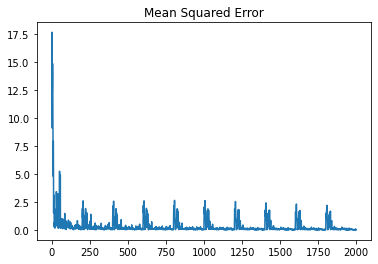

In [35]:
num_epochs = 10
learning_rate = 1e-5
loss = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# attend to history data
for epoch in range(num_epochs):
    for i, x in enumerate(train_loader):   # Load a batch with its (index, )
        # x has dimension [batch, embed_feature, time_length] (N, E, L)
        if torch.cuda.is_available():
            x = x.cuda()

        x_out = x[:,-1:,-1:].detach().clone() # use most recent time 'OT' as output
        x_in_enc = x[:,:-1,:] # drop most recent time data
        x_in_dec = x[:,-1:,:] # from time 1 to current time
        # Warning: change in x_in_enc will also change x since it is refering the same ram address
        # shift all OT by one hour
        #x_in_dec[:,1:,-1:]=x_in_dec[:,:-1,-1:]
        # only change the last OT to previous hour OT
        x_in_dec[:,-1:,-1:]= 0 #x_in_dec[:,-1:,-2:-1]

        optimizer.zero_grad()                             # Intialize the hidden weight to all zeros
        outputs = model(x_in_enc, x_in_dec)[:,-1:,-1:]                             # Forward pass: compute the output class given a image
        error = loss(outputs, x_out)                 # Compute the loss: difference between the output class and the pre-given label
        error.backward()                                   # Backward pass: compute the weight
        optimizer.step()                                  # Optimizer: update the weights of hidden nodes

        losses.append(error.detach().to("cpu").item())

        if (i) % 100 == 0:                              # Logging
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.6f'
                  %(epoch+1, num_epochs, i+1, len(traindata)//batch_size, error.item()))

plt.plot(losses)
plt.title("Mean Squared Error")
plt.show()

Epoch [10/10], Step [10/69], Loss: 0.0104
Epoch [10/10], Step [20/69], Loss: 0.0284
Epoch [10/10], Step [30/69], Loss: 0.0086
Epoch [10/10], Step [40/69], Loss: 0.0192
Epoch [10/10], Step [50/69], Loss: 0.1257
Epoch [10/10], Step [60/69], Loss: 0.1124


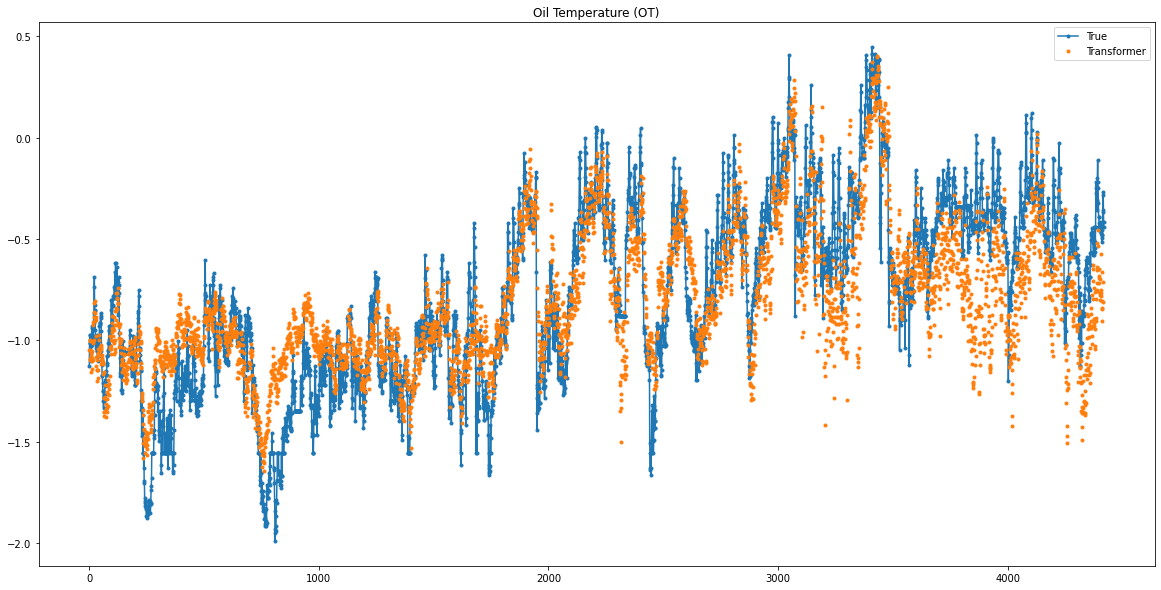

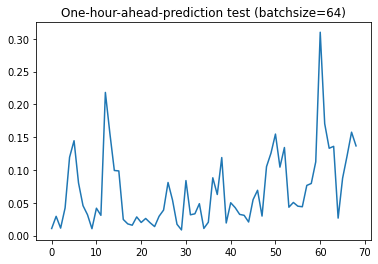

In [36]:
test_pred = np.empty(0,dtype='float32')
test_loss = []
for i, x in enumerate(test_loader):   # Load a batch of images with its (index, )
    if torch.cuda.is_available():
        x = x.cuda()
    x_out = x[:,-1:,-1:].detach().clone() # use most recent time 'OT' as output
    x_in_enc = x[:,:-1,:] # drop most recent time data
    x_in_dec = x[:,-1:,:] # from time 1 to current time
    # Warning: change in x_in_enc will also change x since it is refering the same ram address
    # shift all OT by one hour
    #x_in_dec[:,1:,-1:]=x_in_dec[:,:-1,-1:]
    # only change the last OT to previous hour OT
    x_in_dec[:,-1:,-1:]= 0  #x_in_dec[:,-1:,-2:-1]

    predict = model(x_in_enc, x_in_dec )[:,-1:,-1:]                  #  compute the output class given an input
    error = loss(predict, x_out)              # Compute the loss: difference between the output and the pre-given label
    test_loss.append(error.detach().to("cpu").item()) 
    test_pred = np.concatenate((test_pred, predict.detach().to("cpu").squeeze().numpy()))

    if (i+1) % 10 == 0:                              # Logging
        print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                %(epoch+1, num_epochs, i+1, len(testdata)//batch_size, error.item())) 


test_true = df[13000:,-1:]
t =0
plt.figure(figsize=(20,10))
plt.plot(test_true[t:],'.-', label='True')
plt.plot(test_pred[t:],'.', label='Transformer')
plt.title('Oil Temperature (OT)')
plt.legend()
plt.show()   

plt.plot(test_loss)
plt.title('One-hour-ahead-prediction test (batchsize=64)')
plt.show()

### Training 0-1 (LINEAR_END = True)

 This include current time as deconding feature by shift one hour


- Training setup

In [37]:
# we want attention performed on the time-axis, i.e. data attend history
model = TimeTransformer(d_linear = time_length-1, # L time length how many history
                        nhead=1,
                        d_model= time_embed, # attention head(input) size  = dim of attention output = E embedding size 
                        # since use square attention matrix, attention input = output 
                        d_out = 1,
                        dim_feedforward = time_embed,
                        num_encoder_layers=3, 
                        num_decoder_layers=2,
                        dropout=0,
                        linear_end = True,
                        batch_first= True)  #  input and output dim = (batch, seq=time_length, feature=d_model)
if torch.cuda.is_available():
    model.cuda()

# empty cache
torch.cuda.empty_cache() 
# keep track of loss during training
losses = []

Epoch [1/20], Step [1/200], Loss: 8.188417
Epoch [1/20], Step [101/200], Loss: 0.438894
Epoch [2/20], Step [1/200], Loss: 0.971234
Epoch [2/20], Step [101/200], Loss: 0.412266
Epoch [3/20], Step [1/200], Loss: 0.778870
Epoch [3/20], Step [101/200], Loss: 0.299485
Epoch [4/20], Step [1/200], Loss: 0.686600
Epoch [4/20], Step [101/200], Loss: 0.243537
Epoch [5/20], Step [1/200], Loss: 0.618663
Epoch [5/20], Step [101/200], Loss: 0.212382
Epoch [6/20], Step [1/200], Loss: 0.564761
Epoch [6/20], Step [101/200], Loss: 0.192969
Epoch [7/20], Step [1/200], Loss: 0.521639
Epoch [7/20], Step [101/200], Loss: 0.180052
Epoch [8/20], Step [1/200], Loss: 0.488251
Epoch [8/20], Step [101/200], Loss: 0.171162
Epoch [9/20], Step [1/200], Loss: 0.463292
Epoch [9/20], Step [101/200], Loss: 0.164880
Epoch [10/20], Step [1/200], Loss: 0.444644
Epoch [10/20], Step [101/200], Loss: 0.160252
Epoch [11/20], Step [1/200], Loss: 0.429885
Epoch [11/20], Step [101/200], Loss: 0.156615
Epoch [12/20], Step [1/200],

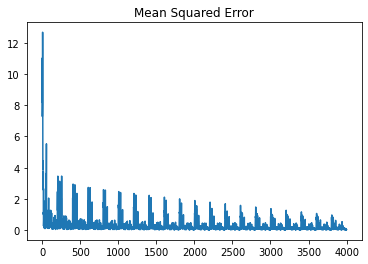

In [38]:
num_epochs = 10
learning_rate = 1e-5
loss = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# attend to history data
for epoch in range(num_epochs):
    for i, x in enumerate(train_loader):   # Load a batch with its (index, )
        # x has dimension [batch, embed_feature, time_length] (N, E, L)
        if torch.cuda.is_available():
            x = x.cuda()
        x_out = x[:,-1:,-1:].detach().clone() # use most recent time 'OT' as output
        x_in_enc = x[:,:-1,:] # drop most recent time data
        x_in_dec = x[:,:,:] # from time 1 to current time
        # Warning: change in x_in_enc will also change x since it is refering the same ram address
        # shift all OT by one hour
        #x_in_dec[:,1:,-1:]=x_in_dec[:,:-1,-1:]
        # only change the last OT to previous hour OT
        x_in_dec[:,-1:,-1:]= x_in_dec[:,-1:,-2:-1]

        optimizer.zero_grad()                             # Intialize the hidden weight to all zeros
        outputs = model(x_in_enc, x_in_dec)[:,-1:,-1:]    # Forward pass: compute the output class given a image
        error = loss(outputs, x_out)                 # Compute the loss: difference between the output class and the pre-given label
        error.backward()                                   # Backward pass: compute the weight
        optimizer.step()                                  # Optimizer: update the weights of hidden nodes

        losses.append(error.detach().to("cpu").item())

        if (i) % 100 == 0:                              # Logging
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.6f'
                  %(epoch+1, num_epochs, i+1, len(traindata)//batch_size, error.item()))
plt.plot(losses)
plt.title("Mean Squared Error")
plt.show()

Epoch [20/20], Step [10/69], Loss: 0.0487
Epoch [20/20], Step [20/69], Loss: 0.0728
Epoch [20/20], Step [30/69], Loss: 0.0213
Epoch [20/20], Step [40/69], Loss: 0.0500
Epoch [20/20], Step [50/69], Loss: 0.1436
Epoch [20/20], Step [60/69], Loss: 0.0487


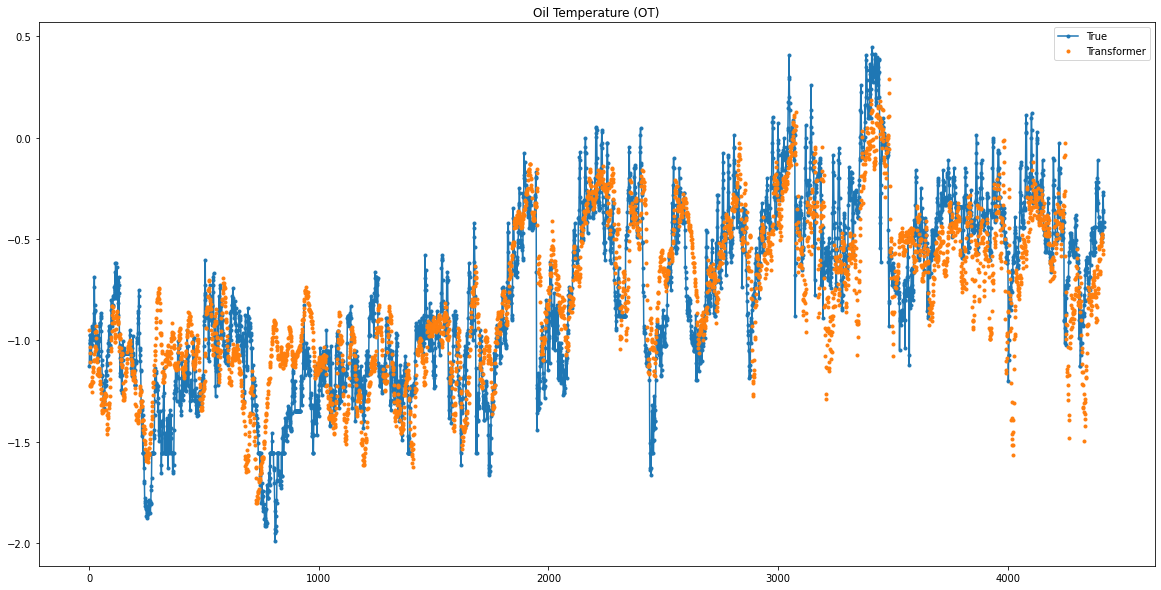

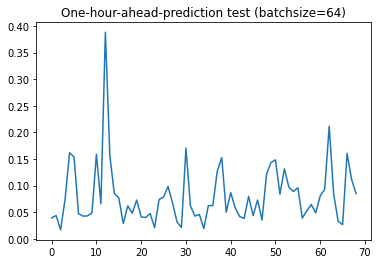

In [39]:
test_pred = np.empty(0,dtype='float32')
test_loss = []
for i, x in enumerate(test_loader):   # Load a batch of images with its (index, )
    if torch.cuda.is_available():
        x = x.cuda()
    x_out = x[:,-1:,-1:].detach().clone() # use most recent time 'OT' as output
    x_in_enc = x[:,:-1,:] # drop most recent time data
    x_in_dec = x[:,:,:] # from time 1 to current time
    # Warning: change in x_in_enc will also change x since it is refering the same ram address
    # shift all OT by one hour
    #x_in_dec[:,1:,-1:]=x_in_dec[:,:-1,-1:]
    # only change the last OT to previous hour OT
    x_in_dec[:,-1:,-1:]= x_in_dec[:,-1:,-2:-1]

    predict = model(x_in_enc, x_in_dec )[:,-1:,-1:]                  #  compute the output class given an input
    error = loss(predict, x_out)              # Compute the loss: difference between the output and the pre-given label
    test_loss.append(error.detach().to("cpu").item())
    test_pred = np.concatenate((test_pred, predict.detach().to("cpu").squeeze().numpy()))

    if (i+1) % 10 == 0:                              # Logging
        print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                %(epoch+1, num_epochs, i+1, len(testdata)//batch_size, error.item())) 


test_true = df[13000:,-1:]
t =0
plt.figure(figsize=(20,10))
plt.plot(test_true[t:],'.-', label='True')
plt.plot(test_pred[t:],'.', label='Transformer')
plt.title('Oil Temperature (OT)')
plt.legend()
plt.show()   

plt.plot(test_loss)
plt.title('One-hour-ahead-prediction test (batchsize=64)')
plt.show()